In [1]:
import pandas as pd
data = pd.read_csv('../data/england-premier-league-matches-stats.csv')
data

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.00,0.00,...,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.00,0.00,...,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.00,0.00,...,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.00,0.00,...,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.00,0.00,...,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1557669600,May 12 2019 - 2:00pm,complete,53331,Liverpool,Wolverhampton Wanderers,Martin Atkinson,38,2.78,1.28,...,1.32,5.80,9.00,1.18,1.57,2.45,4.75,1.95,1.83,Anfield (Liverpool)
376,1557669600,May 12 2019 - 2:00pm,complete,74457,Manchester United,Cardiff City,Jonathan Moss,38,2.00,0.61,...,1.28,6.20,10.00,1.12,1.41,2.00,3.60,1.74,2.05,Old Trafford (Manchester)
377,1557669600,May 12 2019 - 2:00pm,complete,30367,Southampton,Huddersfield Town,Lee Probert,38,1.22,0.33,...,1.41,4.90,7.50,1.19,1.61,2.50,4.75,1.80,2.00,St. Mary's Stadium (Southampton- Hampshire)
378,1557669600,May 12 2019 - 2:00pm,complete,60124,Tottenham Hotspur,Everton,Andre Marriner,38,2.06,1.06,...,2.10,3.50,3.55,1.22,1.71,2.80,6.00,1.59,2.30,Tottenham Hotspur Stadium (London)


In [2]:
data.loc[data['total_goal_count'] <= 1, 'goals_category'] = '0-1'
data.loc[(data['total_goal_count'] >= 2) & (data['total_goal_count'] <= 3), 'goals_category'] = '2-3'
data.loc[data['total_goal_count'] >= 4, 'goals_category'] = '4+'

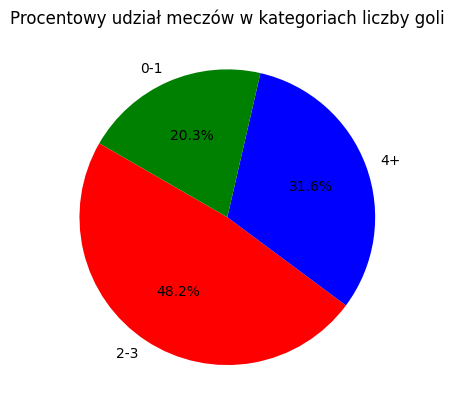

In [4]:
import matplotlib.pyplot as plt
goal_category_counts = data['goals_category'].value_counts()

plt.pie(goal_category_counts, labels=goal_category_counts.index, colors=['red', 'blue', 'green'], autopct='%1.1f%%', startangle=150)
plt.title('Procentowy udział meczów w kategoriach liczby goli')
plt.show()

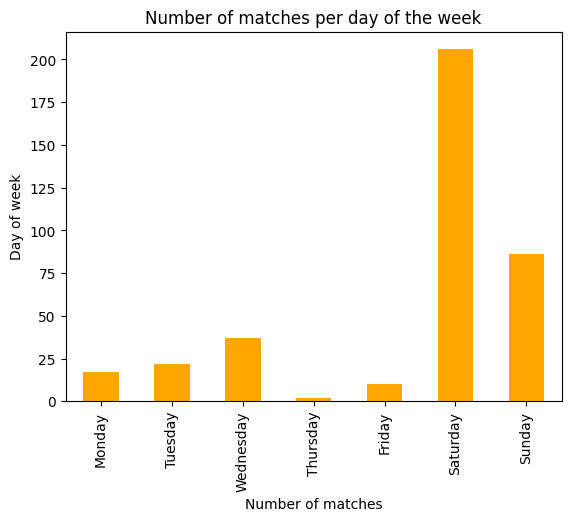

In [ ]:
data['date_GMT'] = pd.to_datetime(data['date_GMT'])
data['day_of_week'] = data['date_GMT'].dt.day_name()

match_by_day = data.groupby('day_of_week').size()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
match_by_day = match_by_day.reindex(days_order)

match_by_day.plot(kind='bar', color='orange')
plt.title('Number of matches per day of the week')
plt.xlabel('Day of week')
plt.ylabel('Number of matches')
plt.show()